In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json

In [101]:
# Load CSVs
day_0 = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_2.csv", delimiter=";")
day_1 = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_3.csv", delimiter=";")
day_2 = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_4.csv", delimiter=";")

In [102]:
df = day_2[day_2["symbol"] == "CROISSANTS"]



print("Unique participants in the market")

print("Buyers: ", df["buyer"].unique())
print("Sellers: ", df["seller"].unique())

df.head

Unique participants in the market
Buyers:  ['Paris' 'Caesar' 'Olivia' 'Camilla']
Sellers:  ['Caesar' 'Camilla' 'Paris' 'Olivia']


<bound method NDFrame.head of        timestamp   buyer   seller      symbol   currency   price  quantity
4            300   Paris   Caesar  CROISSANTS  SEASHELLS  4297.0         6
5            500  Caesar  Camilla  CROISSANTS  SEASHELLS  4295.0        10
6            500  Caesar    Paris  CROISSANTS  SEASHELLS  4295.0         5
12           600  Caesar    Paris  CROISSANTS  SEASHELLS  4295.0         8
14           700  Caesar  Camilla  CROISSANTS  SEASHELLS  4295.0         5
...          ...     ...      ...         ...        ...     ...       ...
17312     998000   Paris   Caesar  CROISSANTS  SEASHELLS  4272.0         5
17324     998600  Caesar    Paris  CROISSANTS  SEASHELLS  4272.0         6
17327     998800  Caesar  Camilla  CROISSANTS  SEASHELLS  4271.0        10
17336     999300  Caesar    Paris  CROISSANTS  SEASHELLS  4271.0         6
17343     999400   Paris   Caesar  CROISSANTS  SEASHELLS  4272.0         8

[1016 rows x 7 columns]>

In [103]:
buyer_info = {}
for buyer in df["buyer"].unique():
    buyer_trades = df[df['buyer'] == buyer]
    biggest_seller = buyer_trades["seller"].value_counts()
    biggest_seller = {biggest_seller.idxmax(): int(biggest_seller.max())}
    buyer_info[buyer] = {
        "frequency": len(buyer_trades),
        "buys_from": biggest_seller
    }

seller_info = {}
for seller in df["seller"].unique():
    buyer_trades = df[df['seller'] == seller]
    biggest_buyer = buyer_trades["buyer"].value_counts()
    biggest_buyer = {biggest_buyer.idxmax(): int(biggest_buyer.max())}
    seller_info[seller] = {
        "frequency": len(df[df['seller'] == seller]),
        "sells_to": biggest_buyer
    }

print("Buyers: ", json.dumps(buyer_info, indent=4))
print("")
print("Sellers: ", json.dumps(seller_info, indent=4))

Buyers:  {
    "Paris": {
        "frequency": 413,
        "buys_from": {
            "Caesar": 413
        }
    },
    "Caesar": {
        "frequency": 601,
        "buys_from": {
            "Paris": 391
        }
    },
    "Olivia": {
        "frequency": 1,
        "buys_from": {
            "Caesar": 1
        }
    },
    "Camilla": {
        "frequency": 1,
        "buys_from": {
            "Paris": 1
        }
    }
}

Sellers:  {
    "Caesar": {
        "frequency": 414,
        "sells_to": {
            "Paris": 413
        }
    },
    "Camilla": {
        "frequency": 209,
        "sells_to": {
            "Caesar": 209
        }
    },
    "Paris": {
        "frequency": 392,
        "sells_to": {
            "Caesar": 391
        }
    },
    "Olivia": {
        "frequency": 1,
        "sells_to": {
            "Caesar": 1
        }
    }
}


## Notes

* Caesar and Paris are big players in this market on both sides
* Camilla seems to only sell --> short position
* Caesar buys everyone else's offers
* Caesar has more buys than sells --> long position

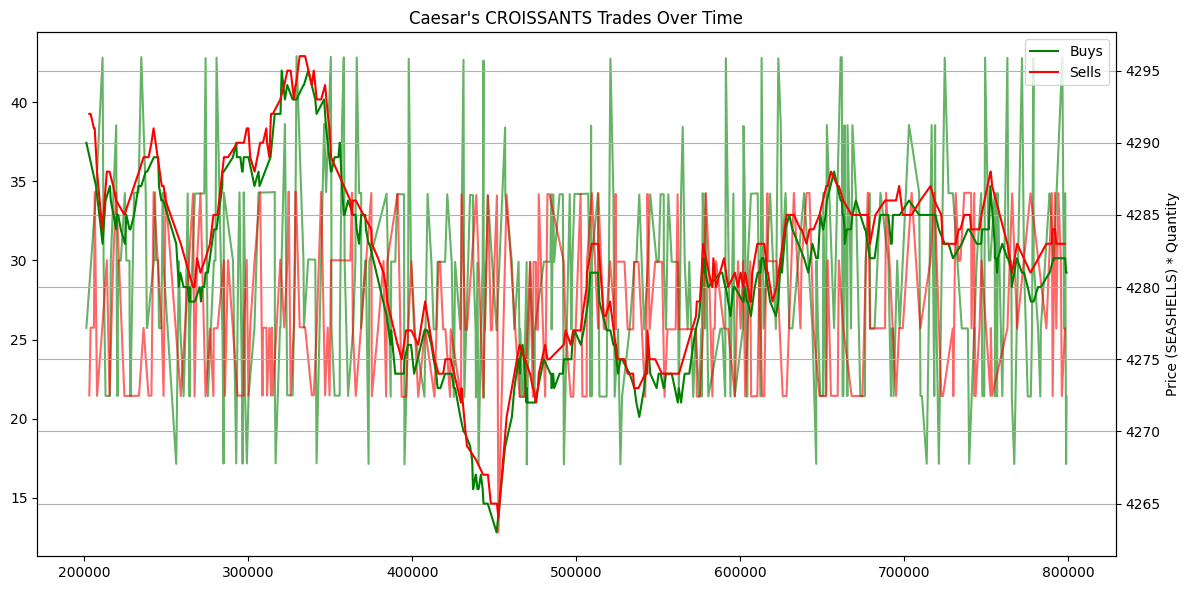

In [104]:
# Lets examine Caesar (CROISSANTS)
df_caesar_buys = df[(df['buyer'] == 'Caesar')]
df_caesar_sells = df[(df['seller'] == 'Caesar')]

df_caesar_buys = df_caesar_buys[(df_caesar_buys['timestamp'] >= 200000) & (df_caesar_buys['timestamp'] <= 800000)]
df_caesar_sells = df_caesar_sells[(df_caesar_sells['timestamp'] >= 200000) & (df_caesar_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Caesar's buys in green
ax1.plot(df_caesar_buys["timestamp"], df_caesar_buys["price"] * df_caesar_buys["quantity"] /1000, 
            color='green', label='Buys', alpha=0.6)

# Plot Caesar's sells in red
ax1.plot(df_caesar_sells["timestamp"], df_caesar_sells["price"] * df_caesar_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.6)

ax2 = ax1.twinx()

# Plot Caesar's buys in green
ax2.plot(df_caesar_buys["timestamp"], df_caesar_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot Caesar's sells in red
ax2.plot(df_caesar_sells["timestamp"], df_caesar_sells["price"], 
            color='red', label='Sells', alpha=1)

plt.xlabel("Timestamp")
plt.ylabel("Price (SEASHELLS) * Quantity")
plt.title("Caesar's CROISSANTS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Notes

* Caesar's trades seem to have a constant vwap despite varying prices
* Seems to be generally bullish

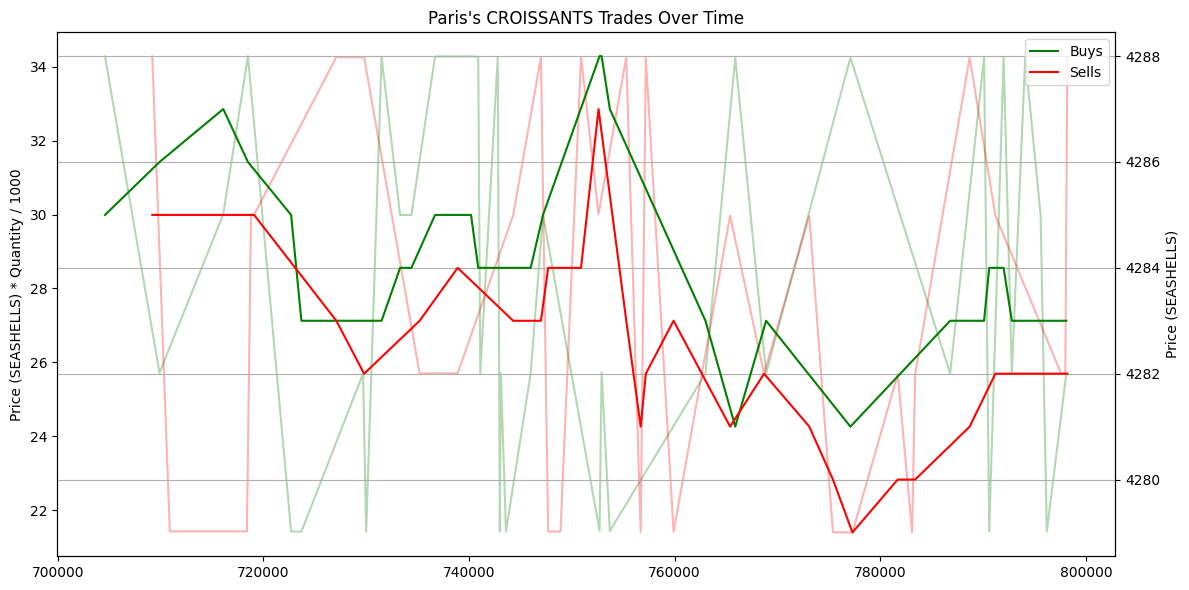

In [110]:
# Lets examine Paris (CROISSANTS)
df_paris_buys = df[(df['buyer'] == 'Paris')]
df_paris_sells = df[(df['seller'] == 'Paris')]

df_paris_buys = df_paris_buys[(df_paris_buys['timestamp'] >= 700000) & (df_paris_buys['timestamp'] <= 800000)]
df_paris_sells = df_paris_sells[(df_paris_sells['timestamp'] >= 700000) & (df_paris_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot paris's buys in green
ax1.plot(df_paris_buys["timestamp"], df_paris_buys["price"] * df_paris_buys["quantity"] /1000, 
            color='green', label='Buys', alpha=0.3)

# Plot paris's sells in red
ax1.plot(df_paris_sells["timestamp"], df_paris_sells["price"] * df_paris_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.3)
ax1.set_ylabel("Price (SEASHELLS) * Quantity / 1000")


ax2 = ax1.twinx()

# Plot paris's buys in green
ax2.plot(df_paris_buys["timestamp"], df_paris_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot paris's sells in red
ax2.plot(df_paris_sells["timestamp"], df_paris_sells["price"], 
            color='red', label='Sells', alpha=1)
ax2.set_ylabel("Price (SEASHELLS)")

plt.xlabel("Timestamp")
plt.title("Paris's CROISSANTS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Notes

* Paris's trades seem to be even more consistent when it comes to vwap
* Seems to be market neutral...

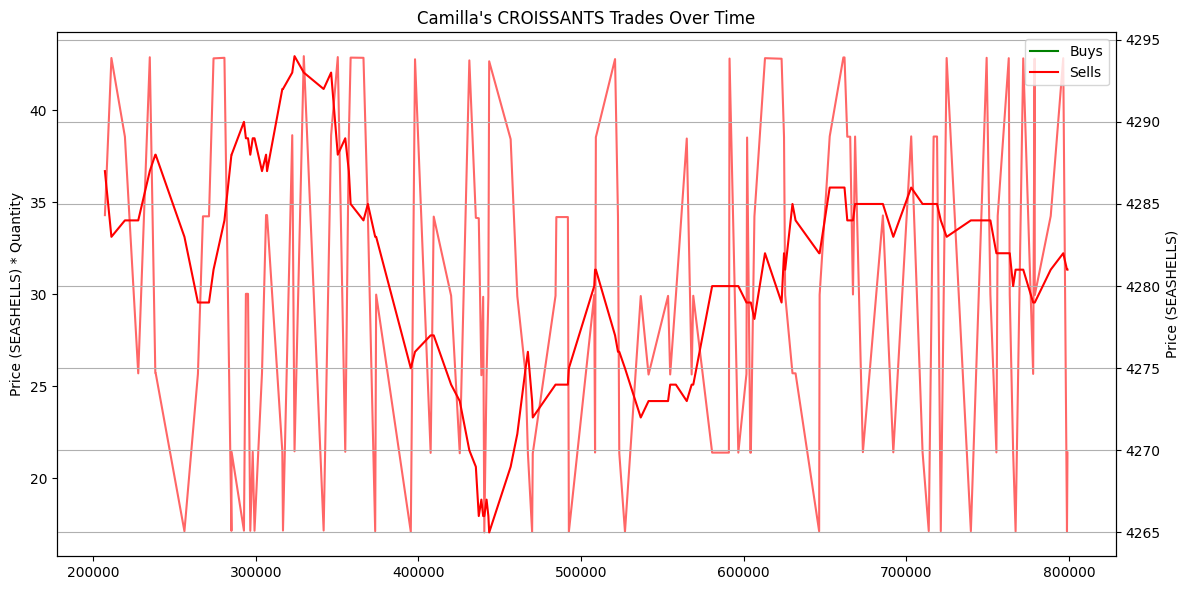

In [106]:
# Lets examine Camilla (CROISSANTS)
df_camilla_buys = df[(df['buyer'] == 'Camilla')]
df_camilla_sells = df[(df['seller'] == 'Camilla')]

df_camilla_buys = df_camilla_buys[(df_camilla_buys['timestamp'] >= 200000) & (df_camilla_buys['timestamp'] <= 800000)]
df_camilla_sells = df_camilla_sells[(df_camilla_sells['timestamp'] >= 200000) & (df_camilla_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot camilla's buys in green
ax1.plot(df_camilla_buys["timestamp"], df_camilla_buys["price"] * df_camilla_buys["quantity"] /1000, 
            color='green', label='Buys', alpha=0.6)

# Plot camilla's sells in red
ax1.plot(df_camilla_sells["timestamp"], df_camilla_sells["price"] * df_camilla_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.6)
ax1.set_ylabel("Price (SEASHELLS) * Quantity")


ax2 = ax1.twinx()

# Plot camilla's buys in green
ax2.plot(df_camilla_buys["timestamp"], df_camilla_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot camilla's sells in red
ax2.plot(df_camilla_sells["timestamp"], df_camilla_sells["price"], 
            color='red', label='Sells', alpha=1)
ax2.set_ylabel("Price (SEASHELLS)")

plt.xlabel("Timestamp")
plt.title("Camilla's CROISSANTS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()